### Ping-Pong Activity

![ping-pong](images/pingpong.png)

In this notebook we will use Julia to simulate the game activity.



##### Evaluate the Position  in the circle

$$
pos(n,ping,pong) \mapsto ??
$$

#### Pseudo-Code

    p = 0
    step = 1
    for i : 1 .. N do
        p = p + step
        if (i mod ping) xor (i mod pong)
            step = (-1)* step
    return p


### Bedingung kgV = 1

In [2]:
function pp2(n,ping=3,pong=4,penalty=-1) 
    step = 1
    pos = 0
    if gcd(ping,pong) != 1 
        return penalty
    end
    for i in 1:n
        pos += step
        if (i%ping==0) !== (i%pong==0)
            step *= -1
        end
    end
    return pos
end

pp2 (generic function with 4 methods)

In [3]:
function pingpong(n,ping=3,pong=4) 
    step = 1
    pos = 0
    if (ping%pong==0) | (pong%ping==0)
        return 0
    end
    for i in 1:n
        pos += step
        if (i%ping==0) !== (i%pong==0)
            step *= -1
        end
    end
    return pos
end

pingpong (generic function with 3 methods)

### Spiel von 1 bis 30


In [4]:
y = [pingpong(n) for n in 1:34]

34-element Array{Int64,1}:
  1
  2
  3
  2
  3
  4
  3
  2
  3
  2
  1
  0
 -1
  ⋮
 -1
  0
  1
  2
  3
  2
  3
  4
  3
  2
  3
  2

INFO: Loading help data...


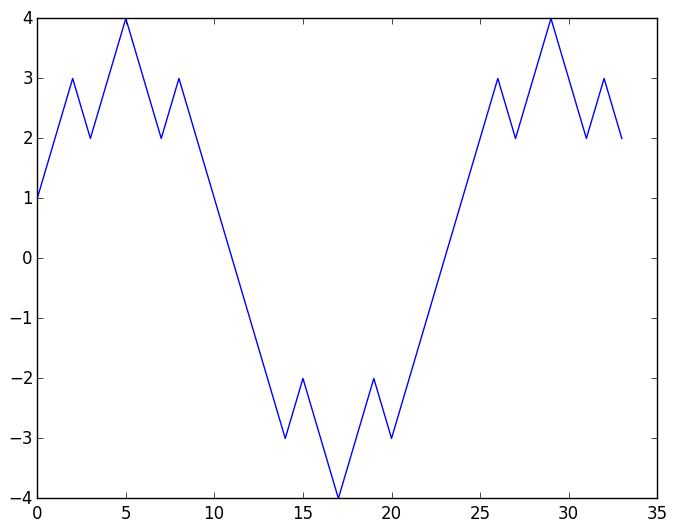

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x116bbfb50>

In [6]:
using PyPlot;
plot(y)

### Divergente Fälle

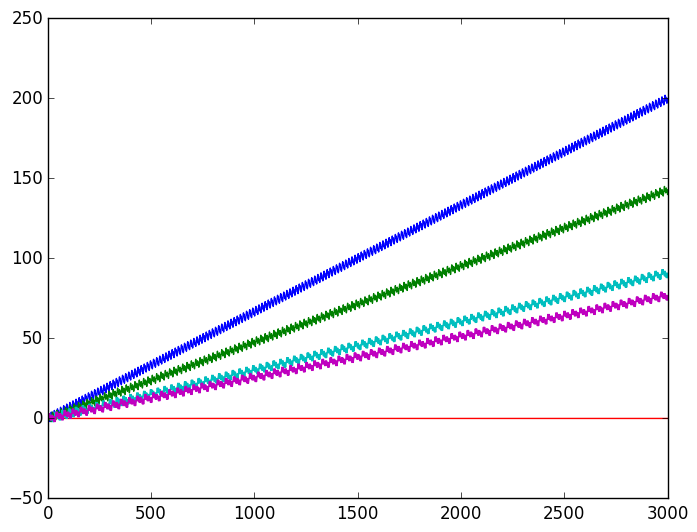

5-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11727b4d0>
 PyObject <matplotlib.lines.Line2D object at 0x11727b750>
 PyObject <matplotlib.lines.Line2D object at 0x11727b990>
 PyObject <matplotlib.lines.Line2D object at 0x11727bb50>
 PyObject <matplotlib.lines.Line2D object at 0x11727bd10>

In [8]:
ymap = [pingpong(n,k,3) for n in 1:3000, k in 5:2:13]
plot(ymap)

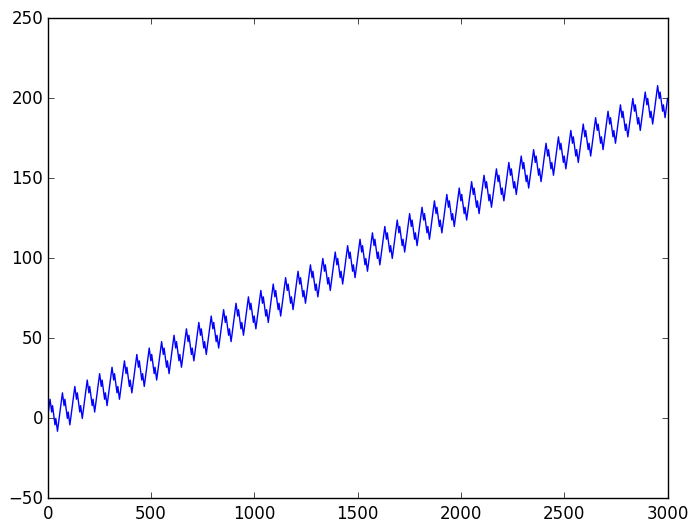

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x114c99910>

In [10]:
ymap = [pingpong(n,20,12) for n in 1:3000]
plot(ymap)

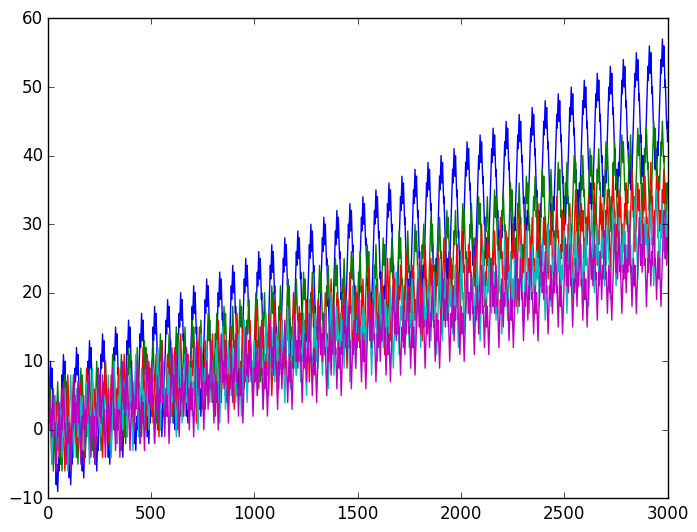

5-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x114ccef10>
 PyObject <matplotlib.lines.Line2D object at 0x114cd31d0>
 PyObject <matplotlib.lines.Line2D object at 0x114cd3410>
 PyObject <matplotlib.lines.Line2D object at 0x114cd35d0>
 PyObject <matplotlib.lines.Line2D object at 0x114cd3790>

In [11]:
ymap = [pingpong(n,k,7) for n in 1:3000, k in 9:2:17
    
]
plot(ymap)

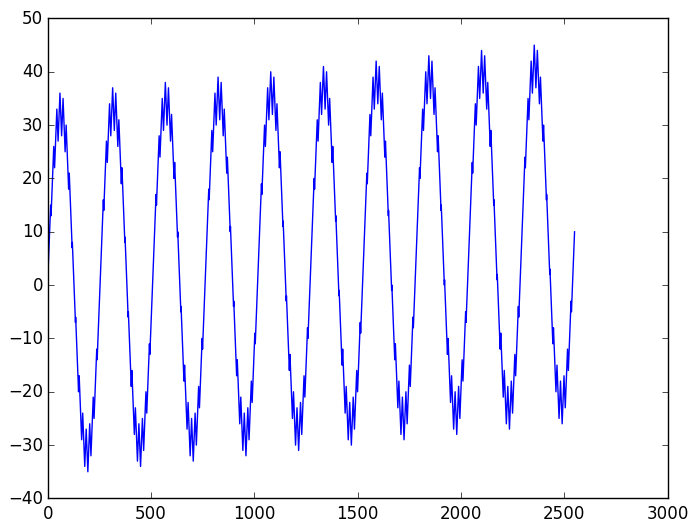

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x114f537d0>

In [12]:
ping=17
pong=15
plot([pingpong(n,ping,pong) for n in 1:10*ping*pong])

### Ping-Pong Wertekarten

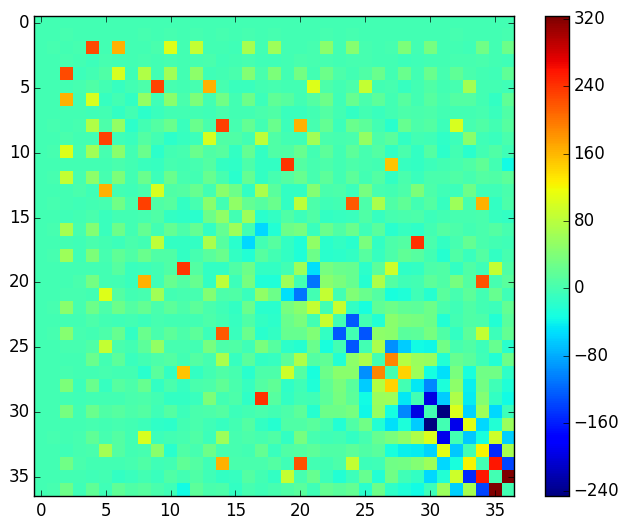

PyObject <matplotlib.colorbar.Colorbar instance at 0x112519d88>

In [12]:
ymap_set = [pingpong(3433,k,l) for l in 1:37, k in 1:37
]
imshow(ymap_set,interpolation="nearest");
colorbar()

min:-924   max:3898

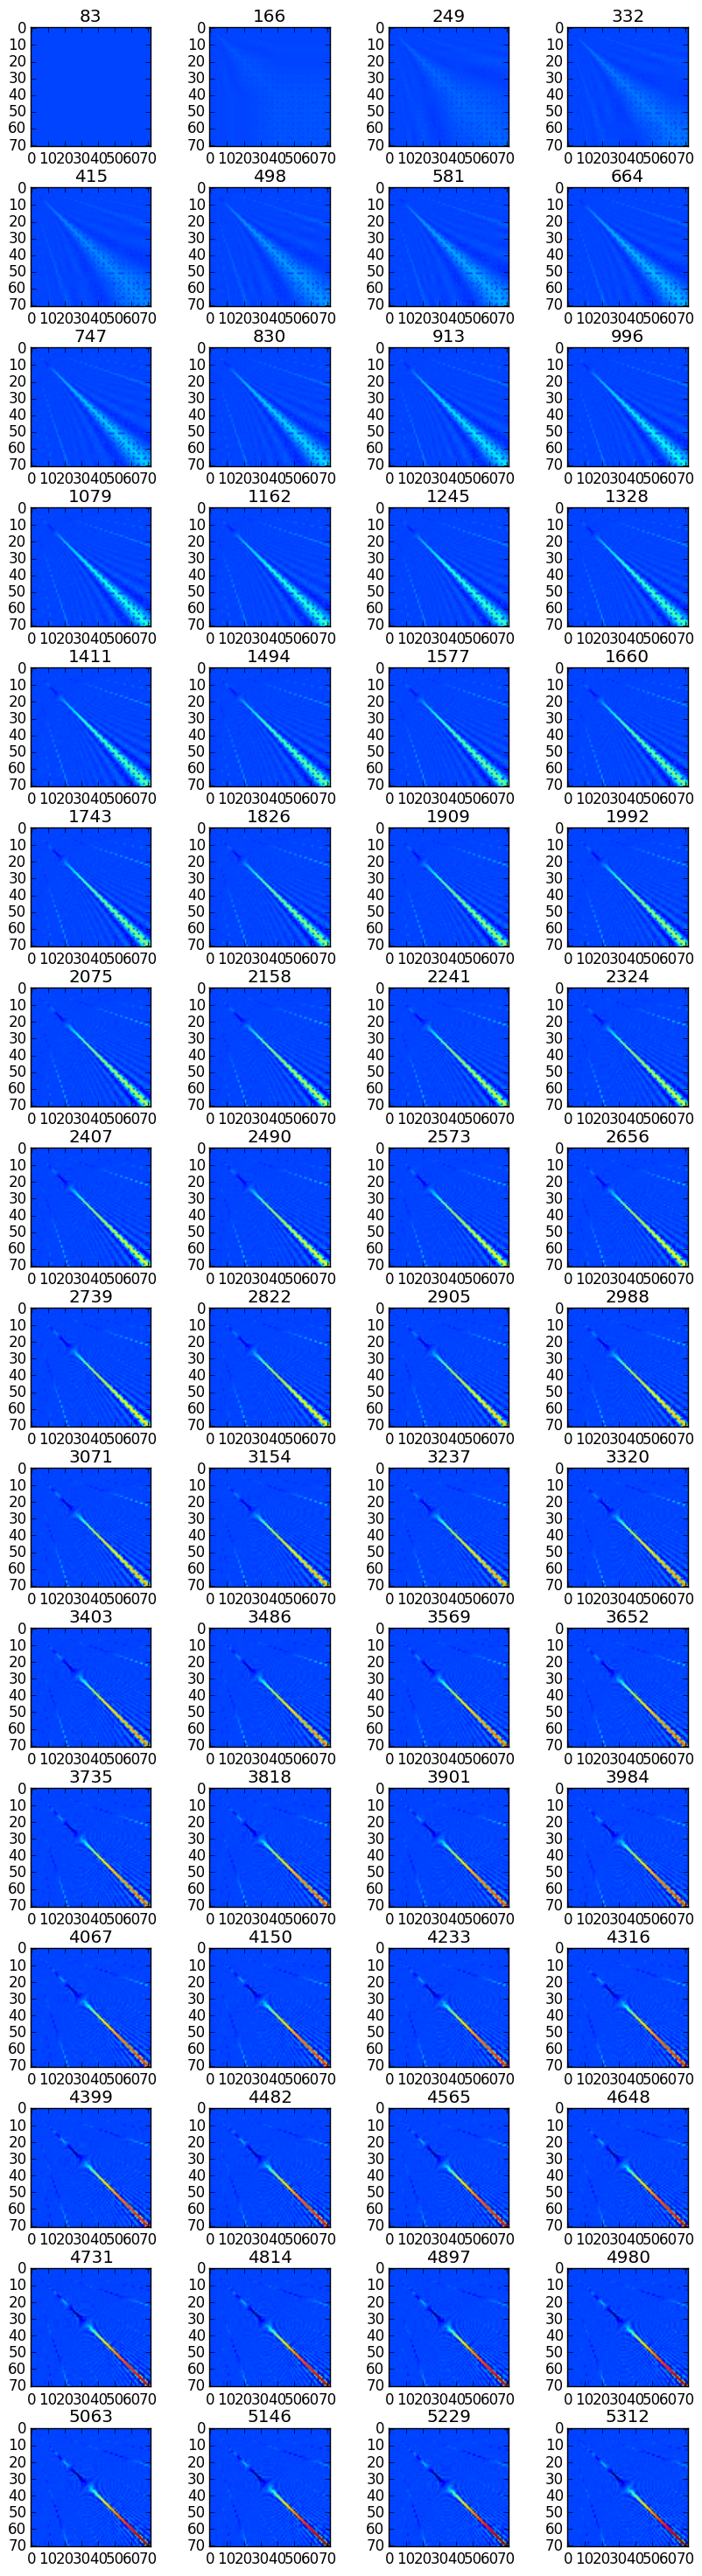

In [20]:
nmax = 5300
slices = 64
dn = round(nmax/slices)
mappp = [pp2(n,k,l) for  l in 3:2:144, k in 4:2:146,n in 1:dn:nmax
]
mappp_min=minimum(mappp)
mappp_max=maximum(mappp)


n_col = 4
n_row = round(slices/n_col)
print("min:")
print(mappp_min)
print("   max:")
print(mappp_max)

figure(figsize=(2 * n_col, 2 * n_row))
subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in 1:n_row * n_col
    subplot(n_row, n_col, i)
    title(int(i*dn))
    imshow(mappp[:,:,i],vmin=mappp_min,vmax=mappp_max)
end


In [16]:
using PyCall
using PyPlot
@pyimport matplotlib.animation as anim

fig = figure()
#ax = axes(xlim=(0, 2), ylim=(-2, 2)) 
function init()
    return imshow(mappp[:,:,1],vmin=mappp_min,vmax=mappp_max)
end

# animation function.  This is called sequentially
function animate(i)
    return imshow(mappp[:,:,i+1],vmin=mappp_min,vmax=mappp_max)
end

# call the animator.  blit=True means only re-draw the parts that have changed.
an=anim.FuncAnimation(fig, animate, init_func=init,
                               frames=60, interval=1, blit=true)

an[:save]("basic_animation.mp4", fps=3, extra_args=["-vcodec", "libx264"])

show()

LoadError: PyError (:PyObject_Call) <type 'exceptions.IndexError'>
IndexError('Julia exception: BoundsError()',)
  File "/Users/guggisberg/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/animation.py", line 766, in save
    anim._draw_next_frame(d, blit=False)
  File "/Users/guggisberg/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/animation.py", line 803, in _draw_next_frame
    self._draw_frame(framedata)
  File "/Users/guggisberg/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/animation.py", line 1106, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)

while loading In[16], in expression starting on line 20

### Erzeuge Divergenzkarte mit kgv=1

In [16]:
pimax=12
nmax = pimax^2*3+10
pp_set = [pp2(n,k,l)  for k in 1:1:pimax,n in 1:1:nmax,   l in 1:1:pimax
]

result = [maximum(pp_set[k,2*k*l+1:3*k*l,l]-maximum(pp_set[k,1:k*l,l]))  for k in 1:1:pimax,l in 1:1:pimax]

12x12 Array{Any,2}:
 2  0  2  0  2  0  2  0  2  0  2  0
 0  0  0  0  0  0  0  0  0  0  0  0
 2  0  0  0  2  0  2  0  0  0  2  0
 0  0  0  0  0  0  0  0  0  0  0  0
 2  0  2  0  0  0  2  0  2  0  2  0
 0  0  0  0  0  0  0  0  0  0  0  0
 2  0  2  0  2  0  0  0  2  0  2  0
 0  0  0  0  0  0  0  0  0  0  0  0
 2  0  0  0  2  0  2  0  0  0  2  0
 0  0  0  0  0  0  0  0  0  0  0  0
 2  0  2  0  2  0  2  0  2  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0

Im Kleinen:

Ping 2 .. 20

Ping 2 .. 20

n_max = 64


min:-95   max:99

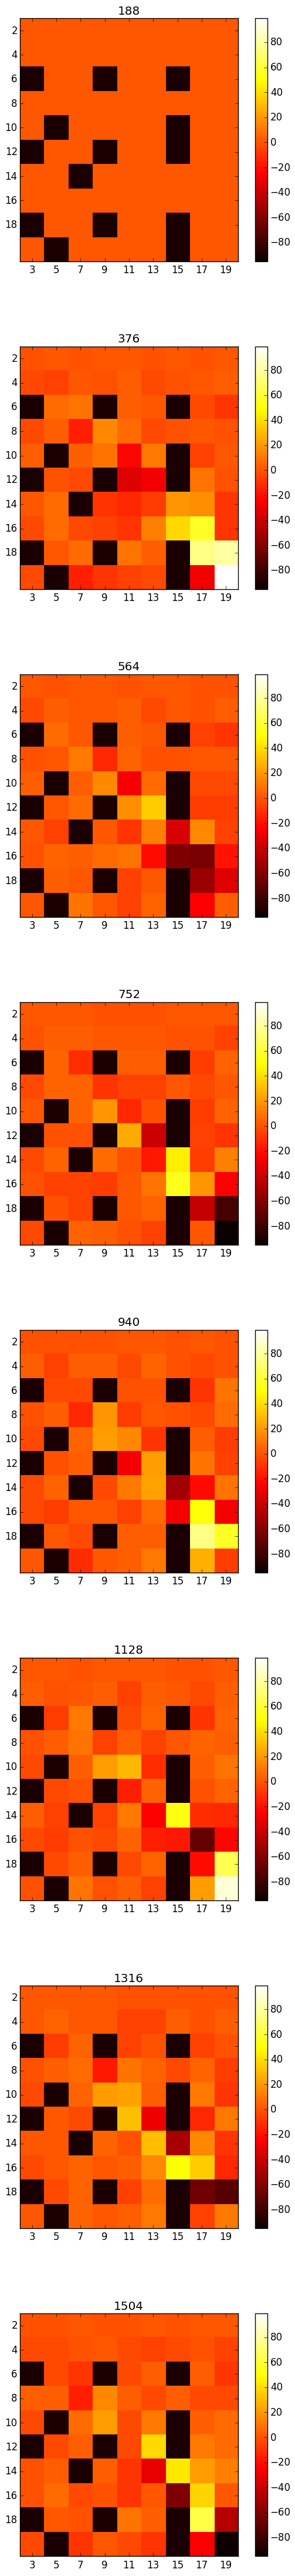

In [34]:

nmax = 1500
slices = 16
dn = round(nmax/slices)
mappp = [pp2(n,k,l,-90) for  l in 2:2:20, k in 3:2:20,n in 1:dn:nmax
]
mappp_min=minimum(mappp)
mappp_max=maximum(mappp)


n_col = 1
n_row = round(slices/n_col)
print("min:")
print(mappp_min)
print("   max:")
print(mappp_max)

figure(figsize=(2*3 * n_col, 2*3 * n_row))
subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)





for i in 1:n_row * n_col
    subplot(n_row, n_col, i)
    title(int(i*dn))
    mg = imshow(mappp[:,:,i],vmin=mappp_min,vmax=mappp_max,interpolation="nearest")
    pycall(mg["set_cmap"],Any,"hot")
    #xticks( 0:8 ,(2,4,6,8,10,12,14,16,18,20))
    yticks( 0:8 ,2:2:20)
    xticks( 0:8,3:2:20)
    
    colorbar()
end

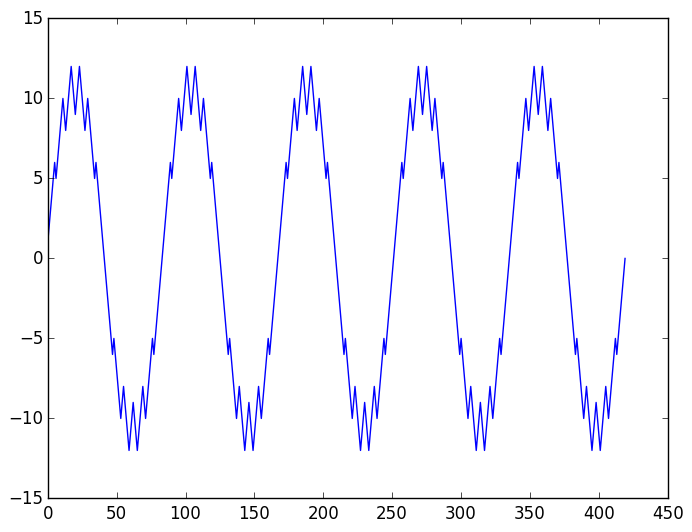

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11bcfc1d0>

In [44]:
ping=6
pong=7
plot([pingpong(n,ping,pong) for n in 1:10*ping*pong])